In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sns.set()
X,y = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = X.T
y = y.reshape(-1,1)

In [56]:
sigmoid = lambda x : 1/(1+np.exp(-x))

In [57]:
classify = lambda arr : np.where(arr>0.5,1,0)

In [58]:
def initialize_weights(input_dim,n_neurons) : 
    W1 = np.random.randn(n_neurons*input_dim).reshape(n_neurons,input_dim)
    W2 = np.random.randn(n_neurons).reshape(1,-1)
    b1 = np.zeros((n_neurons,1))
    b2 = 0
    return [W1,W2],[b1,b2]

In [59]:
def feed_forward(X,Y,W,B) : 
    Z1 = W[0]@X + B[0]
    A1 = sigmoid(Z1)
    Z2 = (W[1]@A1).T + B[1]
    A2 = sigmoid(Z2)
    cache = {"A2":A2,"A1":A1}
    cost=log_loss(Y,A2)
    accuracy=accuracy_score(Y,classify(A2))
    return cost,cache,accuracy

In [60]:
def propagate(X,Y,W,B,cache) :
    m = X.shape[1]
    A2,A1 = cache.values()
    W1,W2 = W
    dW2 = (A1@(A2-Y)).T * 1/m
    db2 = np.sum(A2-Y,0) * 1/m
    dZ1 = ((A2-Y)@W2) * (A1*(1-A1)).T
    dW1 = (X@dZ1).T/m
    db1 = (np.sum(dZ1,0)).reshape(-1,1)/m
    gradients = {"dW2":dW2,"db2":db2[0],"dW1":dW1,"db1":db1.reshape(-1,1)}
    
    return gradients

In [61]:
def update_weights(W,B,gradiets,learning_rate=0.01) :
    dW2,db2,dW1,db1 = gradiets.values()
    W1 = W[0] - learning_rate * dW1
    W2 = W[1] - learning_rate * dW2
    b1 = B[0] - learning_rate * db1
    b2 = B[1] - learning_rate * db2
    return [W1,W2],[b1,b2]

In [62]:
def model(X,Y,epochs,n_neurons) :
    W,B = initialize_weights(X.shape[0],n_neurons)
    history={"loss":[],"accuracy":[]}
    for epoch in range(epochs) : 
        cost,cache,acc = feed_forward(X,Y,W,B)
        gradient = propagate(X,Y,W,B,cache)
        W,B = update_weights(W,B,gradient)
        history["loss"].append(cost)
        history["accuracy"].append(acc)
        if epoch%10==0 : 
            print("epoch {}/{} - loss :{} - accuracy:{}".format(epoch,epochs,cost,acc))
    return W,B,history

In [63]:
W,B,history=model(X,y,1000,20)

epoch 0/1000 - loss :1.6918650302230174 - accuracy:0.18980667838312829
epoch 10/1000 - loss :1.5500181490084681 - accuracy:0.2126537785588752
epoch 20/1000 - loss :1.4248776124818743 - accuracy:0.2513181019332162
epoch 30/1000 - loss :1.3153923802906253 - accuracy:0.29173989455184535
epoch 40/1000 - loss :1.220079826427205 - accuracy:0.3216168717047452
epoch 50/1000 - loss :1.1372470630326221 - accuracy:0.34973637961335674
epoch 60/1000 - loss :1.065177608750741 - accuracy:0.3936731107205624
epoch 70/1000 - loss :1.0022589411370297 - accuracy:0.45166959578207383
epoch 80/1000 - loss :0.9470528251353764 - accuracy:0.4903339191564148
epoch 90/1000 - loss :0.8983218275587995 - accuracy:0.5325131810193322
epoch 100/1000 - loss :0.855027280768501 - accuracy:0.5799648506151143
epoch 110/1000 - loss :0.816311385994896 - accuracy:0.6080843585237259
epoch 120/1000 - loss :0.7814723740062801 - accuracy:0.6344463971880492
epoch 130/1000 - loss :0.7499383066428199 - accuracy:0.6590509666080844
epo

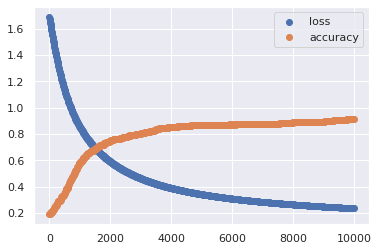

In [67]:
loss=history["loss"]
acc=history["accuracy"]
plt.plot([i*10 for i in range(len(loss))],loss,label="loss")
plt.plot([i*10 for i in range(len(acc))],acc,label="accuracy")
plt.titile("training loss/accuracy")
plt.xlabel("epoch")
plt.legend()